In [1]:
#This analysis examines which factors are most strongly associated with heart disease diagnosis using kaggle heart disease dataset.
#I explore age, chest pain types, gender differences, and exercise-induced symptoms.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('heart_disease_uci.csv')
print(df.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [4]:
#CLEAN DATA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
df[['trestbps', 'chol', 'fbs', 'restecg', 'thalch','exang', 'oldpeak', 'slope', 'ca', 'thal']].isna().sum()

trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64

In [7]:
df[['trestbps', 'chol', 'thalch', 'oldpeak','ca']].median()

trestbps    130.0
chol        223.0
thalch      140.0
oldpeak       0.5
ca            0.0
dtype: float64

In [8]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].median())

In [9]:
df['chol'] = df['chol'].fillna(df['chol'].median())

In [10]:
df['thalch'] = df['thalch'].fillna(df['thalch'].median())

In [11]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())

In [12]:
df[['trestbps', 'chol', 'thalch','oldpeak']].isna().sum()

trestbps    0
chol        0
thalch      0
oldpeak     0
dtype: int64

In [13]:
del(df['ca'])

In [14]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal,0


In [15]:
df['fbs'] = df['fbs'].fillna('unknown')

In [16]:
df['exang'] = df['exang'].fillna('unknown')

In [17]:
df['restecg'] = df['restecg'].fillna('unknown')

In [18]:
df['slope'] = df['slope'].fillna('unknown')

In [19]:
df['thal'] = df['thal'].fillna('unknown')

In [20]:
df[['trestbps', 'chol', 'fbs', 'restecg', 'thalch','exang', 'oldpeak', 'slope', 'thal']].isna().sum()

trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
dtype: int64

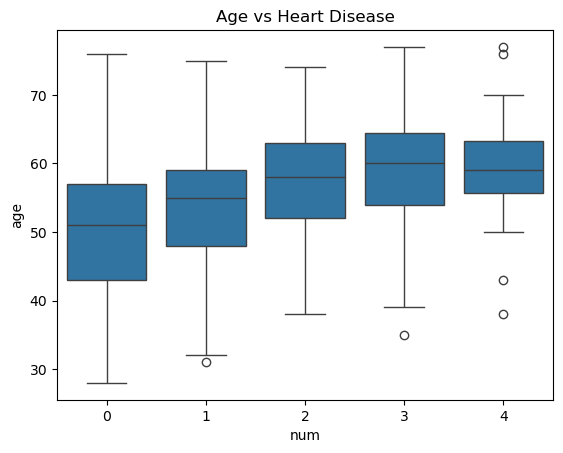

In [21]:
#Calculate boxplot for age vs type of heart disease
sns.boxplot(x='num', y='age', data=df)
plt.title('Age vs Heart Disease')
plt.show()

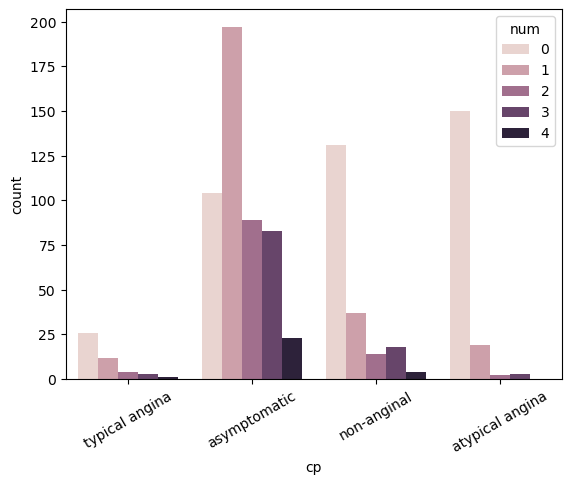

In [22]:
#Calculate count plot of type of chestpain and type of heart disease
sns.countplot(x='cp', hue='num', data=df)
plt.xticks(rotation=30)
plt.show()

In [23]:
#Convert it to binary value
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['fbs'] = df['fbs'].map({True: 1, False: 0})
df['exang'] = df['exang'].map({True: 1, False: 0})

In [24]:
df = pd.get_dummies(
    df,
    columns=['cp', 'restecg', 'slope', 'thal'],
    drop_first=True
)

/var/folders/x0/8yff0_gj7cv0r8khfrp9gzn40000gn/T/ipykernel_47952/3339488017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sex', y='oldpeak', palette='Set2')


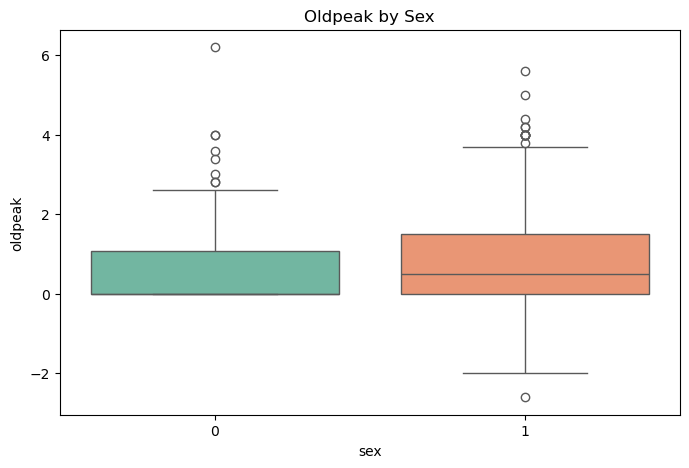

In [25]:
#Calculate box plot of oldpeak according to gender
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='sex', y='oldpeak', palette='Set2')
plt.title('Oldpeak by Sex')
plt.show()


/var/folders/x0/8yff0_gj7cv0r8khfrp9gzn40000gn/T/ipykernel_47952/2444066095.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='cp_typical angina', y='oldpeak', hue='fbs', ci=None)


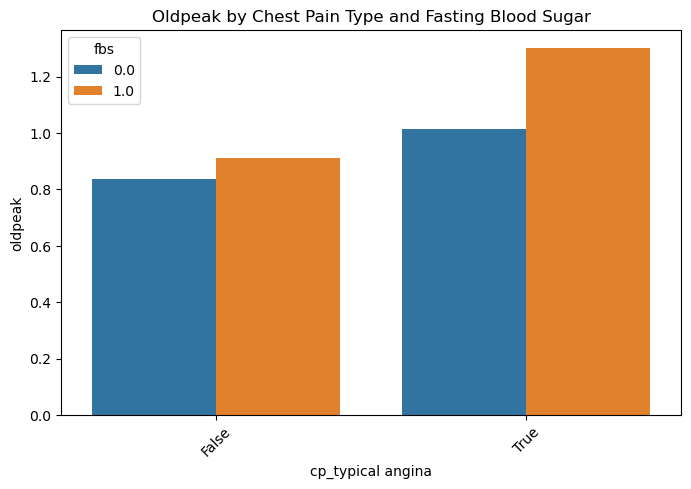

In [26]:
#Calculate bar plot of type of chestpain and oldpeak
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='cp_typical angina', y='oldpeak', hue='fbs', ci=None)
plt.xticks(rotation=45)
plt.title('Oldpeak by Chest Pain Type and Fasting Blood Sugar')
plt.show()


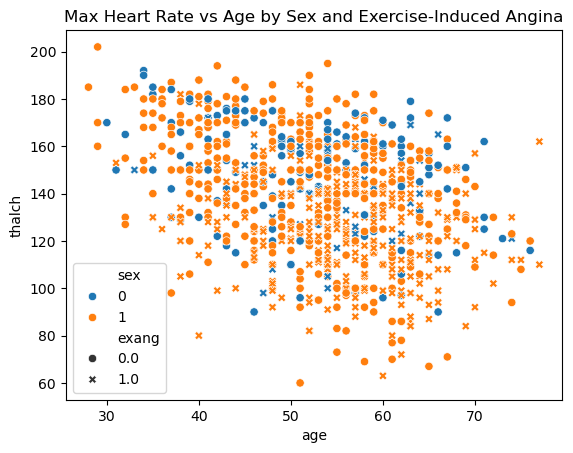

In [27]:
#Create a scatter plot for age, maximum heart rate achieved and angina
sns.scatterplot(data=df, x='age', y='thalch', hue='sex', style='exang')
plt.title('Max Heart Rate vs Age by Sex and Exercise-Induced Angina')
plt.show()


In [ ]:
#The predicted attribute is positively correlated to age.
#The predicted attribute number 1 is very positively correalted to asymptomatic chest pain and predicted attribute 0 is very common with atypical angina chest pain
#Men tend to have more ST depression induced by exercise relative to rest. 
#Men with older age start having a lower maximum heart rate in comparison to women. 
#This is observational data and doesn't establish causation.